In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


# Policy iteration

### Parameters

In [3]:
gamma = 1 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 1000

### Utilities

In [4]:
def actionRewardFunction(initialPosition, action):
    
    if initialPosition in terminationStates:
        return initialPosition, 0
    
    reward = rewardSize
    finalPosition = np.array(initialPosition) + np.array(action)
    if -1 in finalPosition or 4 in finalPosition: 
        finalPosition = initialPosition
        
    return finalPosition, reward

### Initialization

In [5]:
valueMap = np.zeros((gridSize, gridSize))
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

### Policy evaluation

In [12]:
states
actions[0]
# actionRewardFunction(state, action)

[-1, 0]

In [8]:
deltas = []
numIterations = 2
for it in range(numIterations):
    copyValueMap = np.copy(valueMap)
    deltaState = []
    for state in states:
        weightedRewards = 0
        for action in actions:
            finalPosition, reward = actionRewardFunction(state, action)
            weightedRewards += (1/len(actions))*(reward+(gamma*valueMap[finalPosition[0], finalPosition[1]]))
        deltaState.append(np.abs(copyValueMap[state[0], state[1]]-weightedRewards))
        copyValueMap[state[0], state[1]] = weightedRewards
    deltas.append(deltaState)
    valueMap = copyValueMap
    if it in [0,1,2,9, 99, numIterations-1]:
        print("Iteration {}".format(it+1))
        print(valueMap)
        print("")
        

Iteration 1
[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]

Iteration 2
[[ 0.   -1.75 -2.   -2.  ]
 [-1.75 -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -1.75]
 [-2.   -2.   -1.75  0.  ]]



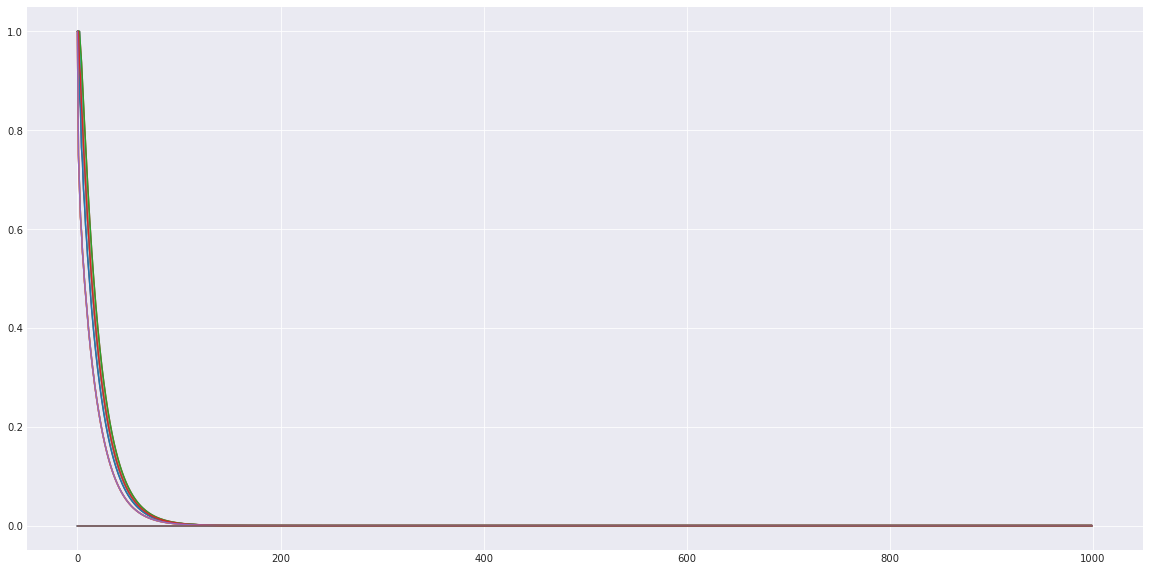

In [32]:
plt.figure(figsize=(20, 10))
plt.plot(deltas)